In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import os


load_dotenv()
GEMINI_API_KEY = os.getenv("GEMINI_API_KEYY")



In [ ]:
from typing import TypedDict
from langgraph.graph import START, StateGraph 
from langchain_openai import ChatOpenAI

model =ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY
)


class State(TypedDict):
      topic: str
      joke: str
      poem: str


def write_joke(state: State):
      topic = state["topic"]
      joke_response = model.invoke(
            [{"role": "user", "content": f"Write a joke about {topic}"}]
      )
      return {"joke": joke_response.content}


def write_poem(state: State):
      topic = state["topic"]
      poem_response = model.invoke(
            [{"role": "user", "content": f"Write a short poem about {topic}"}]
      )
      return {"poem": poem_response.content}


graph = (
      StateGraph(State)
      .add_node(write_joke)
      .add_node(write_poem)
      # write both the joke and the poem concurrently
      .add_edge(START, "write_joke")
      .add_edge(START, "write_poem")
      .compile()
)


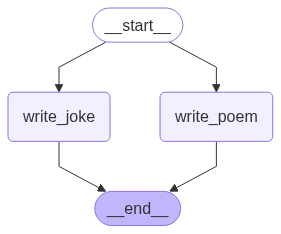

In [3]:
graph

In [ ]:

for msg, metadata in graph.stream( 
    {"topic": "cats"},
    stream_mode="messages",
):
    
    if msg.content and metadata["langgraph_node"] == "write_poem": 
        print(msg.content, end="|", flush=True)
        



A| velvet paw, a silent tread,
Emerald eyes, a sunlit bed.|
A rumbling purr, a gentle knead,
A feline grace,| a whispered creed.
Then sudden leap, a playful chase,
A kingly air, a regal grace.
|

# tags
✅ Use Case: Filter by Task Type Across Multiple Nodes
🎯 Goal: You have multiple steps, but want to stream only generation-related outputs (skip summaries, logs, etc.)
python
Copy
Edit
gen_llm = model.with_config({"tags": ["generation"]})
log_llm = model.with_config({"tags": ["log"]})
summary_llm = model.with_config({"tags": ["summary"]})
Each LLM is in a different node, e.g.:

"write_intro"

"log_query"

"summarize_result"

✅ Stream filtering:
python
Copy
Edit
if "generation" in metadata["tags"]:
    print("🧠 Main reply:", msg.content)